In [2]:
%%capture
cd ..

In [46]:
# Toggle for hiding and showing notebook code

from IPython.display import HTML, Javascript, display
from ipywidgets import widgets

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle();"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
%load_ext autoreload
%autoreload 2

import dill
import matplotlib.pyplot as plt

from dreamcoder.domains.list.handwrittenProperties import handWrittenProperties, getHandwrittenPropertiesFromTemplates
from dreamcoder.domains.list.makeListTasks import joshTasks
from dreamcoder.domains.list.propSim import getPropertySimTasksMatrix, getPriorDistributionsOfProperties, createSimilarTasksDf, getPropSimGrammars
from dreamcoder.domains.list.runUtils import *
from dreamcoder.domains.list.utilsProperties import enumerationProxy
from dreamcoder.grammar import Grammar


# Load relevant tasks, properties and helmholtz frontiers
tasks = joshTasks("3")
properties = getHandwrittenPropertiesFromTemplates(tasks, filterEquivalent=True)
fileName = "data/prop_sig/helmholtz_frontiers/josh_rich_0_10_enumerated/13742_with_josh_fleet_0_10-inputs.pkl"
helmholtzFrontiers = dill.load(open(fileName, "rb"))
valuesToInt = {"allFalse":0, "allTrue":1, "mixed":2}

# Compute prior probabilities (over tasks) for property values
taskPropertyMatrix = getPropertySimTasksMatrix(tasks, properties, valuesToInt)
helmholtzTasksPropertyMatrix = getPropertySimTasksMatrix([f.task for f in helmholtzFrontiers], properties, valuesToInt)
propertyToPriorDistribution = getPriorDistributionsOfProperties(properties, taskPropertyMatrix, valuesToInt)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
114 out of 214 properties after filtering


## Standard vs Long input property signatures

In [30]:
standard_input_tasks = joshTasks("fleet_0_10")
standard_input_tasks = [t for t in standard_input_tasks if t.name not in ["c073", "c076", "c077"]]
long_input_tasks = joshTasks("3_long_inputs_0_10")
properties_long_input = getHandwrittenPropertiesFromTemplates(long_input_tasks, filterEquivalent=True)
properties_standard_input = getHandwrittenPropertiesFromTemplates(standard_input_tasks, filterEquivalent=True)

617 out of 10441 properties after filtering
91 out of 181 properties after filtering


### Properties with different values

In [17]:
valuesToInt = {"allTrue":1, "allFalse":0, "mixed":0}
stand_matrix = getPropertySimTasksMatrix(standard_input_tasks, properties_standard_input, valuesToInt)
long_matrix = getPropertySimTasksMatrix(long_input_tasks, properties_standard_input, valuesToInt)

In [207]:
def show_different_value_properties(task_index):
    
    def print_signatures(signature_a, signature_b, properties, values_to_int):
        int_to_value = {i:v for v,i in values_to_int.items()}
        assert len(signature_a) == len(signature_b)
        assert len(signature_a) == len(properties)
        for i,p in enumerate(properties):
            if signature_a[i] != signature_b[i]:
                print("{}: {} vs {}".format(p.name, int_to_value[signature_a[i]], int_to_value[signature_b[i]]))
            
    print("\nProgram: {}\n{}".format(standard_input_tasks[task_index].program, standard_input_tasks[task_index].describe()))
    print("\nProgram: {}\n{}".format(long_input_tasks[task_index].program, long_input_tasks[task_index].describe()))
    print_signatures(stand_matrix[task_index, :], long_matrix[task_index, :], properties_standard_input, valuesToInt)
    
show_different_value_properties(45)


Program: (lambda (cons 7 $0))
c046 : list(int) -> list(int)
f([8, 8, 5, 5]) = [7, 8, 8, 5, 5]
f([]) = [7]
f([9]) = [7, 9]
f([1, 4]) = [7, 1, 4]
f([3, 8, 6, 7, 0, 3, 4]) = [7, 3, 8, 6, 7, 0, 3, 4]
f([9, 1, 6, 5, 2, 1, 0, 1, 9]) = [7, 9, 1, 6, 5, 2, 1, 0, 1, 9]
f([2, 2, 0, 0, 2, 2, 0, 2, 0, 2]) = [7, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2]
f([4, 7, 0, 5, 0, 3]) = [7, 4, 7, 0, 5, 0, 3]
f([3, 3, 4, 3, 3, 8, 4, 4]) = [7, 3, 3, 4, 3, 3, 8, 4, 4]
f([7, 3, 5]) = [7, 7, 3, 5]
f([6, 9, 6, 9, 6]) = [7, 6, 9, 6, 9, 6]

Program: (lambda (cons 7 $0))
046_1 : list(int) -> list(int)
f([4, 6, 6, 7, 9, 8, 2, 4, 3, 1, 1, 5, 3, 1, 0, 7, 2, 5, 7, 3]) = [7, 4, 6, 6, 7, 9, 8, 2, 4, 3, 1, 1, 5, 3, 1, 0, 7, 2, 5, 7, 3]
f([4, 2, 6, 8, 1, 7, 4, 3, 5, 4, 6, 9, 6, 0, 0, 1, 8, 3, 3, 7, 9, 5, 6, 3, 7, 4, 7, 5, 1, 8, 9, 3, 0, 1]) = [7, 4, 2, 6, 8, 1, 7, 4, 3, 5, 4, 6, 9, 6, 0, 0, 1, 8, 3, 3, 7, 9, 5, 6, 3, 7, 4, 7, 5, 1, 8, 9, 3, 0, 1]
f([4, 4, 1, 7, 8, 6, 2, 0, 5, 9, 6, 4, 3, 8, 1, 1, 0, 2, 9]) = [7, 4, 4, 1, 7, 8, 6, 2, 0, 

### Resulting differences in conditional grammars

In [196]:
# Run Propsim
args = {'resume': None, 'iterations': 1, 'enumerationTimeout': 10, 'unconditionalEnumerationTimeout': None, 'topK': 2, 'pseudoCounts': 30.0, 'aic': 1.0, 'structurePenalty': 1.0, 'arity': 3, 'CPUs': 96, 'cuda': True, 'maximumFrontier': 10, 'reuseRecognition': False, 'useRecognitionModel': True, 'ensembleSize': 1, 'useDSL': True, 'noConsolidation': False, 'testingTimeout': 0, 'testEvery': 1, 'seed': 0, 'activation': 'tanh', 'solver': 'ocaml', 'compressor': 'ocaml', 'matrixRank': None, 'mask': False, 'biasOptimal': False, 'contextual': False, 'taskBatchSize': None, 'taskSplit': None, 'taskReranker': 'default', 'storeTaskMetrics': True, 'rewriteTaskMetrics': False, 'auxiliaryLoss': False, 'parallelTest': False, 'addFullTaskMetrics': False, 'trainset': 'S12', 'doshaping': False, 'dopruning': False, 'skiptesting': False, 'epochs': 99999, 'libraryName': 'josh_rich_0_10', 'propSamplingPrimitives': 'same', 'dataset': 'josh_3_long_inputs_0_10', 'extractor': 'prop_sig', 'hidden': 64, 'propSim': False, 'helmEnumerationTimeout': 1, 'propNumIters': 1, 'hmfSeed': None, 'numHelmFrontiers': None, 'maxFractionSame': 1.0, 'helmholtzFrontiers': 'josh_rich_0_10_enumerated/13742_with_josh_fleet_0_10-inputs.pkl', 'propFilename': None, 'filterSimilarProperties': False, 'computePriorFromTasks': False, 'nSim': 50, 'propPseudocounts': 1, 'onlyUseTrueProperties': True, 'save': False, 'verbose': False, 'weightByPrior': False, 'weightedSim': False, 'taskSpecificInputs': False, 'singleTask': False, 'debug': False, 'propCPUs': 96, 'propSolver': 'ocaml', 'propEnumerationTimeout': 1, 'propUseConjunction': False, 'propAddZeroToNinePrims': False, 'propScoringMethod': 'unique_task_signature', 'propDreamTasks': False, 'propToUse': 'handwritten', 'propSamplingGrammarWeights': 'uniform', 'propUseEmbeddings': False, 'featureExtractor': None}
args["computePriorFromTasks"] = True

prims = get_primitives(args["libraryName"])
baseGrammar = Grammar.uniform([p for p in prims])
for t in standard_input_tasks + long_input_tasks:
    # parses program string and also executes to check that I/O matches parsed program
    t.parse_program(prims)

task2FittedGrammarsPriorFromTasks = []

for tasks in [standard_input_tasks, long_input_tasks]:
    task2FittedGrammar, _, _ = getPropSimGrammars(
       baseGrammar,
       tasks,
       tasks,  
       helmholtzFrontiers, 
       properties_standard_input, 
       args["onlyUseTrueProperties"], 
       args["nSim"], 
       args["propPseudocounts"], 
       args["weightedSim"], 
       compressSimilar=False, 
       weightByPrior=False, 
       recomputeTasksWithTaskSpecificInputs=args["taskSpecificInputs"],
       computePriorFromTasks=args["computePriorFromTasks"], 
       filterSimilarProperties=args["filterSimilarProperties"], 
       maxFractionSame=args["maxFractionSame"], 
       valuesToInt=valuesToInt,
       propSimIteration=0,
       verbose=args["verbose"])
    task2FittedGrammarsPriorFromTasks.append(task2FittedGrammar)

Creating Similar Task Matrix
Finished Creating Similar Task Matrix with size: (13742, 91)

Found program solution for task c001: (lambda (singleton (third $0)))

Found program solution for task c002: (lambda (slice 3 3 $0))

Found program solution for task c003: (lambda (repeat (nth 7 $0) 1))

Found program solution for task c006: (lambda (take (mod 2 5) $0))

Found program solution for task c007: (lambda (take 2 $0))

Found program solution for task c008: (lambda (take 6 (takelast 10 $0)))

Found program solution for task c011: (lambda (takelast 3 (take 4 $0)))

Found program solution for task c012: (lambda (slice 2 4 $0))

Found program solution for task c014: (lambda (slice 3 7 $0))

Found program solution for task c016: (lambda (replaceEl 2 8 $0))

Found program solution for task c025: (lambda (cut_val (second $0) $0))

Found program solution for task c026: (lambda (cut_idx (mod 3 8) $0))

Found program solution for task c030: (lambda (droplast 2 $0))

Found program solution for ta

### Investigate tasks that are harder to solve with long inputs

In [97]:
taskToLogPosteriorsStand = enumerationProxy([task2FittedGrammars[0]], standard_input_tasks, ["propsim_standard_inputs"], verbose=False)["propsim_standard_inputs"]
taskToLogPosteriorsLong = enumerationProxy([task2FittedGrammars[1]], long_input_tasks, ["propsim_long_input_tasks"], verbose=False)["propsim_long_input_tasks"]

LOG_OFFSET = 5
sortedTasksLong = sorted(taskToLogPosteriorsLong.keys(), key=lambda task: task.name)
sortedTasksStand = sorted(taskToLogPosteriorsStand.keys(), key=lambda task: task.name)
for tLong, tStand in zip(sortedTasksLong, sortedTasksStand):
    if taskToLogPosteriorsLong[tLong] + LOG_OFFSET < taskToLogPosteriorsStand[tStand]:
        print(tLong.name, tStand.name)
        print("long_inputs_lp: {}".format(taskToLogPosteriorsLong[tLong]))
        print("stand_inputs_lp: {}".format(taskToLogPosteriorsStand[tStand]))

022_1 c022
long_inputs_lp: -12.856428907579591
stand_inputs_lp: -7.103553159364431
031_1 c031
long_inputs_lp: -43.11022717382957
stand_inputs_lp: -36.38078730241469
032_1 c032
long_inputs_lp: -40.92517811716859
stand_inputs_lp: -33.76935263714586
047_1 c047
long_inputs_lp: -36.628147110993304
stand_inputs_lp: -19.090300056150266
051_1 c051
long_inputs_lp: -17.215182138243804
stand_inputs_lp: -11.632257816717578
053_1 c053
long_inputs_lp: -28.66778300970692
stand_inputs_lp: -22.567686385592985
054_1 c054
long_inputs_lp: -26.42550828291221
stand_inputs_lp: -21.011152393689727
068_1 c068
long_inputs_lp: -44.431889656933784
stand_inputs_lp: -24.337245279916164
069_1 c069
long_inputs_lp: -73.88023894052988
stand_inputs_lp: -49.83080949265343


## View task properties

In [110]:
tasks = long_input_tasks
taskPropertyMatrix = getPropertySimTasksMatrix(tasks, properties, valuesToInt)
helmholtzTasksPropertyMatrix = getPropertySimTasksMatrix([f.task for f in helmholtzFrontiers], properties, valuesToInt)
propertyToPriorDistribution = getPriorDistributionsOfProperties(properties, helmholtzTasksPropertyMatrix, valuesToInt)

# Task select dropdown
taskDropdown = widgets.Dropdown(
    options=[t.name for t in tasks],
    value=tasks[0].name,
    description='Task:',
    disabled=False,
)

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))
taskDropdown.observe(run_all, names="value")

display(taskDropdown)

Dropdown(description='Task:', options=('001_1', '002_1', '003_1', '004_1', '005_1', '006_1', '007_1', '008_1',…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Program: (lambda (++ $0 (cons 7 (cons 3 (cons 8 (cons 4 (singleton 3)))))))
c068 : list(int) -> list(int)
f([8, 0, 8, 0]) = [8, 0, 8, 0, 7, 3, 8, 4, 3]
f([5, 5, 4, 7, 4, 7, 5, 4]) = [5, 5, 4, 7, 4, 7, 5, 4, 7, 3, 8, 4, 3]
f([0]) = [0, 7, 3, 8, 4, 3]
f([]) = [7, 3, 8, 4, 3]
f([6, 2, 1, 6, 2, 1]) = [6, 2, 1, 6, 2, 1, 7, 3, 8, 4, 3]
f([4, 6, 8, 4, 0, 2, 6, 2, 1]) = [4, 6, 8, 4, 0, 2, 6, 2, 1, 7, 3, 8, 4, 3]
f([4, 1]) = [4, 1, 7, 3, 8, 4, 3]
f([2, 2, 2]) = [2, 2, 2, 7, 3, 8, 4, 3]
f([5, 5, 5, 0, 5, 0, 0, 0, 5, 5]) = [5, 5, 5, 0, 5, 0, 0, 0, 5, 5, 7, 3, 8, 4, 3]
f([8, 8, 1, 9, 2]) = [8, 8, 1, 9, 2, 7, 3, 8, 4, 3]
f([9, 1, 9, 1, 9, 6, 6, 9, 1, 9]) = [9, 1, 9, 1, 9, 6, 6, 9, 1, 9, 7, 3, 8, 4, 3]


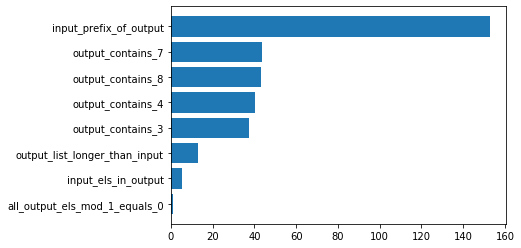

Program: (lambda (++ $0 (cons 7 (cons 3 (cons 8 (cons 4 (singleton 3)))))))
068_1 : list(int) -> list(int)
f([5, 8, 0, 2, 2, 1, 3, 7, 9, 4, 6, 1, 5, 0, 8, 5]) = [5, 8, 0, 2, 2, 1, 3, 7, 9, 4, 6, 1, 5, 0, 8, 5, 7, 3, 8, 4, 3]
f([0, 9, 0, 8, 1, 6, 7, 7, 4, 5, 2, 3, 2]) = [0, 9, 0, 8, 1, 6, 7, 7, 4, 5, 2, 3, 2, 7, 3, 8, 4, 3]
f([3, 2, 5, 5, 1, 9, 5, 6, 1, 5, 8, 2, 3, 0, 5, 9, 0, 4, 8, 8, 8, 2, 9, 0, 8, 3, 2, 4, 3, 9, 3, 6, 1, 3, 7, 5, 6, 4, 4, 4, 7, 2, 6, 1, 2, 6, 1, 0, 6, 5, 4, 5, 6, 2, 2, 0, 5, 0, 6, 6, 9, 0, 0, 9, 4, 5, 3, 6]) = [3, 2, 5, 5, 1, 9, 5, 6, 1, 5, 8, 2, 3, 0, 5, 9, 0, 4, 8, 8, 8, 2, 9, 0, 8, 3, 2, 4, 3, 9, 3, 6, 1, 3, 7, 5, 6, 4, 4, 4, 7, 2, 6, 1, 2, 6, 1, 0, 6, 5, 4, 5, 6, 2, 2, 0, 5, 0, 6, 6, 9, 0, 0, 9, 4, 5, 3, 6, 7, 3, 8, 4, 3]
f([7, 9, 7, 9, 0, 4, 8, 2, 0, 3, 5, 4, 9, 3, 1, 1, 1, 5, 0, 9, 3, 3, 6, 7, 2, 0, 8, 6, 9, 2, 5, 2, 5, 9, 8, 1]) = [7, 9, 7, 9, 0, 4, 8, 2, 0, 3, 5, 4, 9, 3, 1, 1, 1, 5, 0, 9, 3, 3, 6, 7, 2, 0, 8, 6, 9, 2, 5, 2, 5, 9, 8, 1, 7, 3, 8, 4, 3]
f([0, 6

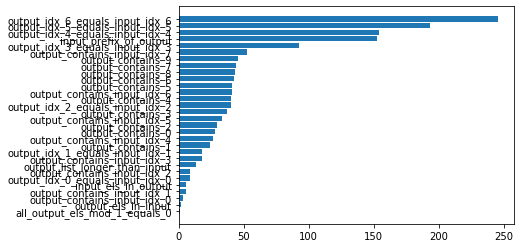

In [114]:
def getTaskIdx(taskName, tasks):
    taskIdx = [i for i,t in enumerate(tasks) if t.name == taskName]
    assert len(taskIdx) == 1
    return taskIdx[0]

taskIdx = getTaskIdx(taskDropdown.value, tasks)

def plot_properties(taskIdx, tasks):
    _, _, sortedPropAndScores = createSimilarTasksDf(
        tasks,
        taskIdx,
        helmholtzFrontiers, 
        properties,
        helmholtzTasksPropertyMatrix, 
        propertyToPriorDistribution=propertyToPriorDistribution, 
        valuesToInt=valuesToInt,
        onlyUseTrueProperties=True,
        filterSimilarProperties=False, 
        maxFractionSame=None, 
        recomputeTasksWithTaskSpecificInputs=False, 
        computePriorFromTasks=False,
        verbose=False)

    print("Program: {}".format(tasks[taskIdx].program))
    print(tasks[taskIdx].describe())

    fig, ax = plt.subplots()
    ax.barh([el[0].name for el in sortedPropAndScores], [1.0 / el[1] for el in sortedPropAndScores])
    ax.invert_yaxis()
    plt.show()
    
plot_properties(taskIdx, standard_input_tasks)
plot_properties(taskIdx, long_input_tasks)

## Enumeration Proxy Plot

In [177]:
from dreamcoder.domains.list.utilsBaselines import getGrammarsFromNeuralRecognizer
from dreamcoder.domains.list.utilsPlotting import plotProxyResults

saveDirectory = "helmholtz_frontiers/josh_rich_0_10_enumerated/"

args["earlyStopping"] = False
args["helmholtzRatio"] = 0.0
args["recognitionSteps"] = 10000
args["recognitionTimeout"] = 3600

# load neural grammars for standard and long inputs
pklFile = "data/prop_sig/helmholtz_frontiers/josh_rich_0_10_enumerated/13742_with_josh_fleet_0_10-inputs_neural_ep=False_RS=10000_RT=3600_hidden=64_r=0.0_contextual=False_0_99_recognizer.pkl_grammars.pkl"
neuralGrammarLongInput = dill.load(open(pklFile, "rb"))
pklFile = "data/prop_sig/helmholtz_frontiers/josh_rich_0_10_enumerated/13742_with_josh_fleet_0_10-inputs_neural_ep=False_RS=10000_RT=3600_hidden=64_r=0.0_contextual=False_0_99_grammars.pkl"
neuralGrammarStandInput = dill.load(open(pklFile, "rb"))
neuralGrammars = [neuralGrammarStandInput, neuralGrammarLongInput]

# load prop sig grammars for standard and long inputs
pklFile = "data/prop_sig/helmholtz_frontiers/josh_rich_0_10_enumerated/13742_with_josh_fleet_0_10-inputs_prop_sig_neural_ep=False_RS=10000_RT=3600_hidden=64_r=0.0_contextual=False_0_99_recognizer.pkl_grammars.pkl"
propSigGrammarLongInput = dill.load(open(pklFile, "rb"))
pklFile = "data/prop_sig/helmholtz_frontiers/josh_rich_0_10_enumerated/13742_with_josh_fleet_0_10-inputs_prop_sig_neural_ep=False_RS=10000_RT=3600_hidden=64_r=0.0_contextual=False_0_99_recognizer.pkl_grammars_josh_fleet_0_10.pkl"
propSigGrammarStandInput = dill.load(open(pklFile, "rb"))
propSigGrammars = [propSigGrammarStandInput, propSigGrammarLongInput]

# helmholtlszGrammar = baseGrammar.insideOutside(helmholtzFrontiers, pseudoCounts=1)

### Ground truth program log posterior per task for standard inputs

In [201]:
grammars = [neuralGrammars[0], helmholtzGrammar, task2FittedGrammars[0], propSigGrammars[0], task2FittedGrammarsPriorFromTasks[0], baseGrammar]
modelNames = ["neural", "helmholtzFitted", "propsim", "propsim (alt prop score)", "propSigNeural", "uniform"]
modelToLogPosteriors = enumerationProxy(grammars, standard_input_tasks, modelNames, verbose=True)


-------------------------------------------------------------------------------
c001 : list(int) -> list(int)
f([2, 4, 3, 2]) = [3]
f([9, 6, 9, 8, 6]) = [9]
f([0, 0, 0, 0, 0]) = [0]
f([8, 1, 8]) = [8]
f([5, 7, 5, 7, 5]) = [5]
f([1, 1, 1, 1]) = [1]
f([7, 9, 3, 4]) = [3]
f([7, 7, 7]) = [7]
f([5, 3, 6]) = [6]
f([2, 2, 2, 8]) = [2]
f([0, 6, 4, 4, 0, 6, 4]) = [4]
Ground Truth Program: (lambda (singleton (third $0)))
---------------------------------------------------------------------------------
neural: -7.205084241518971
helmholtzFitted: -9.062243729034815
propsim: -4.924512702908675
propsim (alt prop score): -4.192526332445857
propSigNeural: -4.924512702908675
uniform: -10.728320673921449

-------------------------------------------------------------------------------
c002 : list(int) -> list(int)
f([0, 5]) = []
f([5, 6, 1, 3, 2, 0, 7, 8, 9, 4]) = [1]
f([6, 7, 8, 1, 4, 3, 0, 5, 9, 2]) = [8]
f([7, 4, 3, 9, 5, 8, 2, 1, 6]) = [3]
f([4, 6]) = []
f([3, 9]) = []
f([4, 7, 1, 2, 6, 3, 8, 9, 0, 

Ground Truth Program: (lambda (slice 2 4 $0))
---------------------------------------------------------------------------------
neural: -11.246467488564651
helmholtzFitted: -11.896961669435576
propsim: -10.284869366301221
propsim (alt prop score): -9.386009899676699
propSigNeural: -10.242100755096828
uniform: -14.129518055583603

-------------------------------------------------------------------------------
c012 : list(int) -> list(int)
f([3, 3, 4, 7, 6]) = [3, 4, 7]
f([7, 8, 2, 0, 4, 2]) = [8, 2, 0]
f([6]) = []
f([2, 9, 4]) = [9, 4]
f([6, 8]) = [8]
f([1, 6, 1]) = [6, 1]
f([0, 8, 0, 8, 8, 0, 8]) = [8, 0, 8]
f([8]) = []
f([5, 5, 5]) = [5, 5]
f([9, 3, 2, 6]) = [3, 2, 6]
f([4, 4]) = [4]
Ground Truth Program: (lambda (slice 2 4 $0))
---------------------------------------------------------------------------------
neural: -11.22674526885028
helmholtzFitted: -11.896961669435576
propsim: -8.204709297522546
propsim (alt prop score): -9.156056146005216
propSigNeural: -8.204709297522546
uniform

Ground Truth Program: (lambda (drop 2 $0))
---------------------------------------------------------------------------------
neural: -5.620815882914334
helmholtzFitted: -7.035547699521558
propsim: -7.050424981343147
propsim (alt prop score): -5.191149152462824
propSigNeural: -7.050424981343147
uniform: -10.728320673921449

-------------------------------------------------------------------------------
c030 : list(int) -> list(int)
f([6, 4, 8, 1, 0]) = [6, 4, 8]
f([9, 7, 4, 3, 8, 1]) = [9, 7, 4, 3]
f([2, 5, 7, 8, 2, 2, 9, 3, 1, 0]) = [2, 5, 7, 8, 2, 2, 9, 3]
f([5, 4, 5, 0]) = [5, 4]
f([6, 2, 9, 7, 8, 3, 8, 5, 0]) = [6, 2, 9, 7, 8, 3, 8]
f([5, 3]) = []
f([6, 4, 1, 6, 7, 2, 5, 8]) = [6, 4, 1, 6, 7, 2]
f([0, 0, 3, 3, 0, 3, 0]) = [0, 0, 3, 3, 0]
f([5, 7, 1, 8, 9, 4, 1, 6, 2, 3]) = [5, 7, 1, 8, 9, 4, 1, 6]
f([9, 7, 2, 5, 9, 4, 6, 8, 4]) = [9, 7, 2, 5, 9, 4, 6]
f([1, 0, 1]) = [1]
Ground Truth Program: (lambda (droplast 2 $0))
-------------------------------------------------------------------

Ground Truth Program: (lambda (append $0 9))
---------------------------------------------------------------------------------
neural: -12.639380471159134
helmholtzFitted: -14.19909152536721
propsim: -9.352111319934878
propsim (alt prop score): -11.594805780749601
propSigNeural: -7.446518596821359
uniform: -10.728320673921449

-------------------------------------------------------------------------------
c039 : list(int) -> list(int)
f([9, 3, 6]) = [9, 3, 6, 3]
f([2, 1, 0, 1, 7, 8, 1, 8, 7]) = [2, 1, 0, 1, 7, 8, 1, 8, 7, 9]
f([9, 1, 4]) = [9, 1, 4, 3]
f([0, 5, 6, 5, 5]) = [0, 5, 6, 5, 5]
f([4, 5, 8, 4, 0, 2, 8, 7, 2]) = [4, 5, 8, 4, 0, 2, 8, 7, 2, 9]
f([1, 5, 7, 3, 4, 8, 6, 9, 2]) = [1, 5, 7, 3, 4, 8, 6, 9, 2, 9]
f([7, 8, 4, 6, 3, 5, 1]) = [7, 8, 4, 6, 3, 5, 1]
f([3, 8, 6]) = [3, 8, 6, 3]
f([7, 2, 4, 4, 9, 5, 7, 2, 3]) = [7, 2, 4, 4, 9, 5, 7, 2, 3, 9]
f([0, 0, 6, 6, 0, 0]) = [0, 0, 6, 6, 0, 0]
f([2, 1, 9]) = [2, 1, 9, 3]
Ground Truth Program: (lambda (if (eq? (length $0) 3) (append $0

neural: -22.16026593591934
helmholtzFitted: -29.8240878675189
propsim: -19.090300056150266
propsim (alt prop score): -18.220635943746785
propSigNeural: -18.892623701787347
uniform: -38.98735678508865

-------------------------------------------------------------------------------
c048 : list(int) -> list(int)
f([6, 4, 7, 9]) = [6]
f([4, 8, 6]) = [4]
f([3, 3, 3]) = [3]
f([2, 2]) = [2]
f([1, 9, 9, 5, 5]) = [1]
f([0, 0, 0, 0]) = [0]
f([7, 4, 7, 8, 7, 1, 6]) = [7]
f([2, 1]) = [2]
f([9, 6, 6, 3]) = [9]
f([5, 5, 5, 5, 5, 5]) = [5]
f([8, 8, 8, 8, 8]) = [8]
Ground Truth Program: (lambda (take 1 $0))
---------------------------------------------------------------------------------
neural: -5.1439750749643895
helmholtzFitted: -6.9603938342060445
propsim: -5.163297861711836
propsim (alt prop score): -5.002896939582879
propSigNeural: -5.163297861711836
uniform: -10.728320673921449

-------------------------------------------------------------------------------
c049 : list(int) -> list(int)
f([3, 3

Ground Truth Program: (lambda (cut_idx 5 $0))
---------------------------------------------------------------------------------
neural: -6.269659632468434
helmholtzFitted: -6.753217558001404
propsim: -5.918747197031842
propsim (alt prop score): -5.638522718633471
propSigNeural: -5.918747197031842
uniform: -10.728320673921449

-------------------------------------------------------------------------------
c057 : list(int) -> list(int)
f([3, 3, 3, 3, 3, 3, 3]) = [3, 3, 3, 3, 3, 3, 4, 3]
f([2, 7, 8, 4, 0, 6, 5, 1]) = [2, 7, 8, 4, 0, 6, 4, 5, 1]
f([2, 3, 9, 7, 6, 0, 0, 8]) = [2, 3, 9, 7, 6, 0, 4, 0, 8]
f([2, 9, 9, 2, 9, 9, 2, 2, 2]) = [2, 9, 9, 2, 9, 9, 4, 2, 2, 2]
f([5, 9, 3, 7, 2, 1, 6, 0, 8]) = [5, 9, 3, 7, 2, 1, 4, 6, 0, 8]
f([4, 5, 4, 5, 5, 9, 5, 4]) = [4, 5, 4, 5, 5, 9, 4, 5, 4]
f([6, 6, 3, 3, 6, 7, 3, 7, 3, 3]) = [6, 6, 3, 3, 6, 7, 4, 3, 7, 3, 3]
f([2, 5, 6, 3, 2, 9, 2, 0, 0, 0]) = [2, 5, 6, 3, 2, 9, 4, 2, 0, 0, 0]
f([3, 9, 9, 3, 3, 9, 3, 9, 3, 3]) = [3, 9, 9, 3, 3, 9, 4, 3, 9, 3, 3

Ground Truth Program: (lambda (cons 9 (append $0 7)))
---------------------------------------------------------------------------------
neural: -17.672615290605105
helmholtzFitted: -19.931509691359146
propsim: -11.89510893041054
propsim (alt prop score): -17.106708067520465
propSigNeural: -11.689197575359264
uniform: -17.79307970171325

-------------------------------------------------------------------------------
c066 : list(int) -> list(int)
f([5, 6, 5, 8]) = [6, 5, 8, 5]
f([1, 6, 6]) = [6, 6, 1]
f([8, 2, 4, 7, 3, 0]) = [2, 4, 7, 3, 0, 8]
f([7, 9, 8, 2, 5, 1, 2, 4]) = [9, 8, 2, 5, 1, 2, 4, 7]
f([3, 7]) = [7, 3]
f([0, 1, 8, 9, 2, 7, 5]) = [1, 8, 9, 2, 7, 5, 0]
f([3, 2, 2, 5, 1, 0, 8, 7, 1, 0]) = [2, 2, 5, 1, 0, 8, 7, 1, 0, 3]
f([1, 4, 3]) = [4, 3, 1]
f([2, 9, 9, 5, 6]) = [9, 9, 5, 6, 2]
f([0, 7, 3, 3, 3, 9, 9, 6]) = [7, 3, 3, 3, 9, 9, 6, 0]
f([4, 1, 5, 8, 6, 5, 4, 0, 9]) = [1, 5, 8, 6, 5, 4, 0, 9, 4]
Ground Truth Program: (lambda (append (drop 1 $0) (first $0)))
---------------------

### Plot ground truth program log posterior for standard inputs

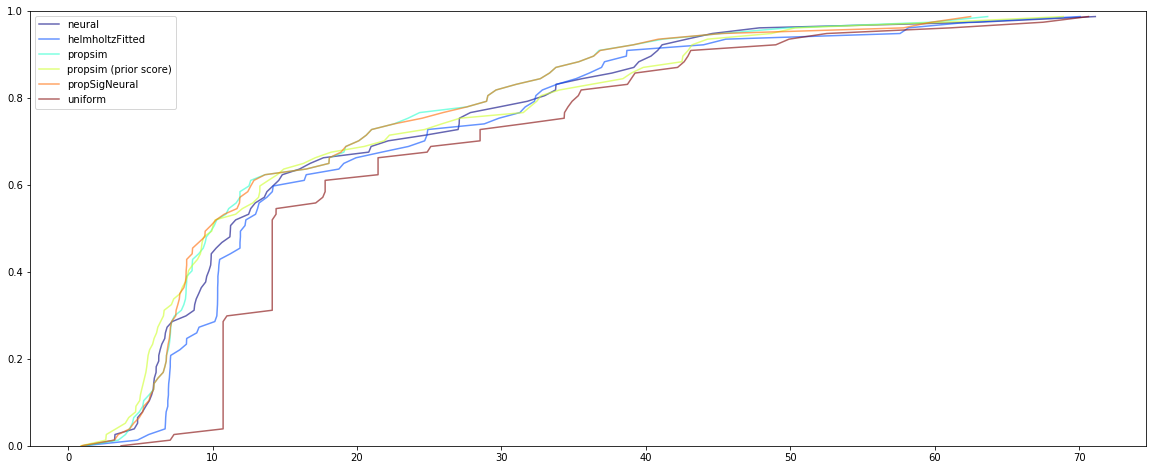

In [198]:
modelToLogPosteriors = {model: [task2LogPosterior[t] for t in sorted(task2LogPosterior.keys(), key=lambda task: task.name)] for model, task2LogPosterior in modelToLogPosteriors.items()}
plt.figure(figsize=(20, 8))
plotProxyResults(modelToLogPosteriors, save=False)

### Ground truth program log posterior per task for long inputs

In [202]:
grammars = [neuralGrammars[1], helmholtzGrammar, task2FittedGrammars[1], task2FittedGrammarsPriorFromTasks[1], propSigGrammars[1], baseGrammar]
modelNames = ["neural", "helmholtzFitted", "propsim", "propsim (alt prop score)", "propSigNeural", "uniform"]
modelToLogPosteriors = enumerationProxy(grammars, long_input_tasks, modelNames, verbose=True)


-------------------------------------------------------------------------------
001_1 : list(int) -> list(int)
f([1, 2, 5, 7, 9, 3, 1, 8, 5, 4, 0, 3, 3, 6]) = [5]
f([4, 4, 1, 5, 9, 7, 6, 2, 8, 3, 5, 3, 4, 4, 0, 1, 2, 9]) = [1]
f([9, 7, 8, 9, 4, 0, 2, 2, 6, 6, 2, 2, 3, 4, 9, 9, 3, 9, 5, 3, 4, 9, 7, 7, 2, 7, 4, 1, 5, 3, 5, 9, 6, 8, 0, 8, 3, 9, 4, 1, 0, 5]) = [8]
f([9, 7, 3, 7, 8, 4, 3, 6, 9, 8, 1, 4, 7, 5, 9, 0, 2, 0, 0, 7, 8, 1, 7, 8, 8, 9, 4, 4, 7, 4, 1]) = [3]
f([1, 0, 0, 3, 1, 1, 2, 6, 4, 0, 7, 3, 5, 1, 8, 9, 7, 5, 5]) = [0]
f([5, 8, 1, 8, 3, 5, 2, 0, 4, 3, 0, 2, 2, 6, 9, 7, 8, 8, 7, 5, 0, 7, 1, 9, 7, 1, 5, 8, 1, 4, 7, 6, 4, 6, 8, 0, 6, 4, 2, 5, 1, 8, 5, 0, 3, 5, 5, 9, 2, 1, 1, 6, 6, 7, 9, 6, 0, 8]) = [1]
f([3, 0, 4, 7, 4, 7, 9, 3, 5, 6, 2, 7, 2, 4, 1, 1, 0, 6, 2, 8, 7, 4, 5, 6, 4, 6, 6, 5, 4, 9, 8, 9, 6, 0, 5, 5, 2, 6, 2, 9, 4]) = [4]
f([2, 0, 1, 7, 7, 8, 3, 1, 4, 0, 3, 5, 0, 3, 5, 3, 7, 8, 5, 4, 4, 1, 6, 8, 2, 2, 3, 4, 7, 4, 2, 9, 5, 0, 5, 2, 6, 5, 9, 6, 8, 2, 7, 2, 8, 6, 6, 3, 8,

Ground Truth Program: (lambda (take 2 $0))
---------------------------------------------------------------------------------
neural: -5.411672528962534
helmholtzFitted: -6.8984332068468674
propsim: -4.246482506273544
propsim (alt prop score): -4.06611082025952
propSigNeural: -5.084275660874571
uniform: -10.728320673921449

-------------------------------------------------------------------------------
007_1 : list(int) -> list(int)
f([5, 2, 0, 0, 8, 1, 3, 9, 4, 5, 6, 3, 4, 7, 4, 2]) = [5, 2]
f([7, 8, 8, 9, 9, 4, 3, 5, 0, 6, 8, 2, 6, 1, 7, 7, 6, 1, 2, 5, 0, 3, 5, 5, 3, 4, 1, 5, 4, 0, 1]) = [7, 8]
f([0, 0, 3, 2, 1, 8, 5, 4, 7, 5, 9, 1, 1, 4, 8, 5, 7, 0, 3, 7, 0, 9, 6, 7, 1, 3, 6, 5, 7, 2, 4, 0, 2, 2]) = [0, 0]
f([9, 7, 7, 4, 8, 9, 6, 5, 2, 9, 1, 2, 6, 4, 7, 1, 1, 9, 6, 3, 0, 9, 9, 2, 7, 6, 1, 9, 0, 9, 0, 6, 1, 2, 7, 8, 1, 8, 8, 6, 1, 3, 7, 9, 8, 2, 0, 4, 5, 4, 5, 8, 9, 1, 0, 0, 6, 5, 4, 6, 0, 5, 4, 5, 5, 4]) = [9, 7]
f([7, 1, 9, 2, 2, 6, 8, 8, 3, 3, 4, 4, 5, 0, 1, 6, 9, 3, 2]) = [7, 1]
f

f([4, 1, 0, 2, 3, 9, 8, 4, 6, 9, 7, 8, 2, 7, 0, 7, 5, 2, 3]) = [1, 0, 2]
Ground Truth Program: (lambda (slice 2 4 $0))
---------------------------------------------------------------------------------
neural: -10.72631930843207
helmholtzFitted: -11.896961669435576
propsim: -10.284869366301221
propsim (alt prop score): -10.299411150816354
propSigNeural: -10.282467728232598
uniform: -14.129518055583603

-------------------------------------------------------------------------------
012_1 : list(int) -> list(int)
f([8, 5, 8, 9, 7, 5, 8, 2, 9, 4, 5, 9, 1, 2, 0, 6, 3, 0]) = [5, 8, 9]
f([2, 4, 8, 8, 5, 9, 0, 2, 9, 0, 3, 2, 5, 5, 3, 1, 1, 6, 9, 6, 4, 9, 4, 1, 7, 8, 7, 2]) = [4, 8, 8]
f([3, 5, 1, 6, 0, 4, 6, 7, 0, 1, 6, 5, 1, 5, 7, 1, 9, 4, 2, 5, 0, 4, 8, 0]) = [5, 1, 6]
f([7, 3, 3, 1, 1, 6, 7, 8, 5, 3, 9, 4, 4, 2, 5, 3, 9, 5, 0, 5, 6, 9, 2, 3, 2, 4, 8, 9, 2, 9]) = [3, 3, 1]
f([9, 0, 6, 5, 2, 8, 7, 2, 4, 3, 6, 5, 1, 5]) = [0, 6, 5]
f([1, 9, 4, 3, 6, 6, 7, 2, 9, 0, 2, 7, 2, 2, 4, 2, 7, 0, 3, 4,

Ground Truth Program: (lambda (replaceEl 2 8 $0))
---------------------------------------------------------------------------------
neural: -10.475599707008634
helmholtzFitted: -10.367743470345928
propsim: -10.794147272134051
propsim (alt prop score): -10.759661096062882
propSigNeural: -11.331369921648921
uniform: -14.129518055583603

-------------------------------------------------------------------------------
017_1 : list(int) -> list(int)
f([1, 6, 7, 2, 5, 5, 3, 0, 6, 4, 9, 5, 7, 6, 0, 8, 3, 5, 8, 9, 7, 9, 6, 6, 9, 9, 6, 4, 7, 6, 1, 2, 9, 9, 9, 7, 3, 8, 1, 9, 5, 3, 4, 8, 3, 0]) = [1, 8, 7, 2, 5, 5, 3, 0, 6, 4, 9, 5, 7, 6, 0, 8, 3, 5, 8, 9, 7, 9, 6, 6, 9, 9, 6, 4, 7, 6, 1, 2, 9, 9, 9, 7, 3, 8, 1, 9, 5, 3, 4, 8, 3, 0]
f([8, 1, 1, 2, 4, 2, 1, 7, 6, 0, 2, 7, 0, 6, 3, 0, 5, 9, 8, 9, 4, 5, 7, 7, 4, 6, 7, 1, 8, 1, 4, 8, 5, 0, 7, 2, 8, 6, 4, 6, 5, 5, 5, 3, 8, 7, 9, 2, 3, 5, 6, 4, 0, 8, 7, 9, 4, 4, 3, 1, 6, 0, 3, 5, 5, 9, 3, 8, 9, 5, 2, 5, 2, 8, 0, 0, 1, 3, 9, 5, 0, 7, 4, 4, 2, 3, 0, 1, 0,

Ground Truth Program: (lambda (replaceEl 6 3 $0))
---------------------------------------------------------------------------------
neural: -11.353831606017238
helmholtzFitted: -10.349821645151277
propsim: -12.750628205803235
propsim (alt prop score): -12.452032012600752
propSigNeural: -9.856696629989496
uniform: -14.129518055583603

-------------------------------------------------------------------------------
020_1 : list(int) -> list(int)
f([2, 7, 4, 4, 8, 4, 4, 7, 2, 7, 1, 4, 0, 6, 7, 8, 5, 8, 1, 3, 5, 3, 6, 7, 7, 0, 9, 9, 3, 3, 6]) = [6, 7, 4, 4, 8, 4, 4, 7, 2, 7, 1, 4, 0, 6, 7, 8, 5, 8, 1, 3, 5, 3, 6, 7, 7, 0, 9, 9, 3, 3, 6]
f([0, 0, 5, 4, 9, 3, 7, 2, 2, 5, 1, 6, 3, 8, 5, 2]) = [2, 0, 5, 4, 9, 3, 7, 2, 2, 5, 1, 6, 3, 8, 5, 2]
f([5, 0, 7, 6, 6, 0, 0, 3, 1, 8, 7, 3, 5, 9, 2, 0, 7, 0, 4, 2, 9, 9, 5, 6]) = [6, 0, 7, 6, 6, 0, 0, 3, 1, 8, 7, 3, 5, 9, 2, 0, 7, 0, 4, 2, 9, 9, 5, 6]
f([2, 1, 3, 3, 7, 5, 8, 2, 3, 4, 7, 4, 3, 1, 6, 9, 6, 6, 8, 5, 3, 8, 8, 0, 4, 6, 0, 7, 2, 2, 3, 7, 4, 4, 0

Ground Truth Program: (lambda (insert 5 2 $0))
---------------------------------------------------------------------------------
neural: -10.807256755969192
helmholtzFitted: -10.293200936250209
propsim: -12.856428907579591
propsim (alt prop score): -10.48443753873144
propSigNeural: -10.93496334225227
uniform: -14.129518055583603

-------------------------------------------------------------------------------
023_1 : list(int) -> list(int)
f([0, 4, 7, 2, 7, 3, 0, 9, 3, 6, 8, 5, 1, 7, 4, 2, 8, 8, 7, 4, 8, 2, 4, 9, 0, 6, 9, 6, 0, 2, 1, 2, 5, 5, 8, 9, 4, 0, 1, 0, 8, 7, 6, 2, 1, 7, 0, 8, 2, 9, 4, 1, 7, 1, 7, 6, 7, 3, 9, 1, 6, 4]) = [0, 5, 4, 7, 2, 7, 3, 0, 9, 3, 6, 8, 5, 1, 7, 4, 2, 8, 8, 7, 4, 8, 2, 4, 9, 0, 6, 9, 6, 0, 2, 1, 2, 5, 5, 8, 9, 4, 0, 1, 0, 8, 7, 6, 2, 1, 7, 0, 8, 2, 9, 4, 1, 7, 1, 7, 6, 7, 3, 9, 1, 6, 4]
f([1, 6, 2, 6, 4, 7, 5, 3, 9, 7, 0, 8]) = [1, 5, 6, 2, 6, 4, 7, 5, 3, 9, 7, 0, 8]
f([4, 8, 0, 2, 7, 4, 0, 5, 9, 9, 1, 6, 3, 8, 9, 0, 8, 0, 6, 4, 5, 0, 9, 2, 7, 0, 2, 5, 3, 5, 

f([0, 0, 0, 8, 9, 5, 2, 6, 7, 0, 8, 2, 9, 5, 7, 1, 0, 3, 9, 8, 1, 8, 7, 1, 4, 8, 4, 0, 9, 6, 2, 0, 6, 3, 7, 3, 1, 5, 7, 9]) = [0, 8, 9, 5, 2, 6, 7, 0, 8, 2, 9, 5, 7, 1, 0, 3, 9, 8, 1, 8, 7, 1, 4, 8, 4, 0, 9, 6, 2, 0, 6, 3, 7, 3, 1, 5, 7, 9]
Ground Truth Program: (lambda (drop 2 $0))
---------------------------------------------------------------------------------
neural: -9.46518982272542
helmholtzFitted: -7.035547699521558
propsim: -8.87813338381191
propsim (alt prop score): -9.029409245486717
propSigNeural: -7.278701941739218
uniform: -10.728320673921449

-------------------------------------------------------------------------------
030_1 : list(int) -> list(int)
f([4, 3, 9, 9, 5, 2, 8, 6, 7, 3, 5, 2, 7, 7, 1, 4, 7, 3, 1, 0, 5, 4, 8, 8, 9, 1]) = [4, 3, 9, 9, 5, 2, 8, 6, 7, 3, 5, 2, 7, 7, 1, 4, 7, 3, 1, 0, 5, 4, 8, 8]
f([0, 4, 9, 3, 6, 8, 1, 7, 5, 2]) = [0, 4, 9, 3, 6, 8, 1, 7]
f([3, 6, 7, 8, 4, 1, 9, 2, 3, 5, 0]) = [3, 6, 7, 8, 4, 1, 9, 2, 3]
f([3, 4, 4, 6, 5, 9, 9, 1, 5, 2, 8, 4, 0

Ground Truth Program: (lambda (if (gt? (first $0) (last $0)) (drop 2 $0) (droplast 2 $0)))
---------------------------------------------------------------------------------
neural: -44.00831448358212
helmholtzFitted: -36.93090546930157
propsim: -40.92517811716859
propsim (alt prop score): -41.412832509020966
propSigNeural: -42.05586263653679
uniform: -42.194160028722585

-------------------------------------------------------------------------------
033_1 : list(int) -> list(int)
f([6, 9, 2, 3, 8, 8, 6, 1, 6, 9, 7, 3, 4, 7, 9, 4, 5, 7, 0, 6]) = [3, 9, 2, 6, 8, 8, 6, 1, 6, 9, 7, 3, 4, 7, 9, 4, 5, 7, 0, 6]
f([2, 6, 4, 0, 6, 9, 7, 1, 5, 3, 8, 8, 7]) = [0, 6, 4, 2, 6, 9, 7, 1, 5, 3, 8, 8, 7]
f([7, 0, 7, 5, 3, 4, 3, 2, 8, 6, 1, 7, 4, 4, 1, 0, 2, 2, 6, 9, 6, 2]) = [5, 0, 7, 7, 3, 4, 3, 2, 8, 6, 1, 7, 4, 4, 1, 0, 2, 2, 6, 9, 6, 2]
f([9, 7, 6, 7, 0, 2, 3, 8, 9, 7, 5, 2, 1, 6, 2, 9, 6, 2, 4, 1, 0, 5, 1, 0, 4, 9, 6, 0, 4, 8, 2, 8, 6, 1, 1, 7, 7, 5, 5, 7, 3, 0]) = [7, 7, 6, 9, 0, 2, 3, 8, 9, 7, 5

Ground Truth Program: (lambda (if (eq? (second $0) (third $0)) (swap 1 4 $0) (swap 2 3 $0)))
---------------------------------------------------------------------------------
neural: -41.14851481207202
helmholtzFitted: -45.53413360055273
propsim: -40.130512806939116
propsim (alt prop score): -39.53688214664745
propSigNeural: -48.41540840645336
uniform: -49.91113465951743

-------------------------------------------------------------------------------
036_1 : list(int) -> list(int)
f([7, 0, 3, 2, 9, 5, 8, 1, 0, 1, 9, 5, 9, 0, 8, 6, 1, 7, 9, 9, 5, 0, 3, 4, 8, 0, 6, 7, 7, 7, 0, 0, 1, 1, 6, 8, 2, 3, 1, 4, 2, 6, 4, 6, 0, 8, 5, 3, 6, 1, 1, 0, 8]) = [2, 0, 3, 7, 9, 5, 8, 1, 0, 1, 9, 5, 9, 0, 8, 6, 1, 7, 9, 9, 5, 0, 3, 4, 8, 0, 6, 7, 7, 7, 0, 0, 1, 1, 6, 8, 2, 3, 1, 4, 2, 6, 4, 6, 0, 8, 5, 3, 6, 1, 1, 0, 8]
f([5, 6, 4, 6, 3, 8, 5, 4, 3, 8, 2, 1, 0, 7, 4, 7, 1, 3, 8, 8, 6, 0, 8, 0, 6, 5, 0, 0, 6, 2, 8, 1, 5, 7, 6, 8, 7, 1, 3, 2, 4, 0, 1, 3, 9, 7, 6, 8, 9, 3, 9, 1, 9, 5, 8, 5, 5, 9, 1, 9, 6, 7, 

neural: -13.677783464474825
helmholtzFitted: -14.19909152536721
propsim: -7.720676149392773
propsim (alt prop score): -7.937807255683277
propSigNeural: -15.007749971327033
uniform: -10.728320673921449

-------------------------------------------------------------------------------
039_1 : list(int) -> list(int)
f([6, 6, 0, 4, 9, 7, 8, 8, 6, 6, 6, 7, 4, 7, 4, 3, 8, 4, 4, 3, 2, 0, 0, 1, 8, 7, 2, 8, 5, 0, 5, 5, 6, 7, 3, 7, 2, 3, 9, 3]) = [6, 6, 0, 4, 9, 7, 8, 8, 6, 6, 6, 7, 4, 7, 4, 3, 8, 4, 4, 3, 2, 0, 0, 1, 8, 7, 2, 8, 5, 0, 5, 5, 6, 7, 3, 7, 2, 3, 9, 3]
f([8, 9, 5, 6, 4, 6, 8, 7, 3, 3, 2, 8, 4, 8, 9, 3, 8, 6, 0, 0, 3, 7, 5, 8, 3, 0, 7, 4, 8, 8, 0, 6, 3, 0, 6, 9, 4, 7, 2, 5, 5, 3, 1, 6, 7, 8, 6, 5, 7, 5, 7, 1, 3, 9, 7, 9, 2, 2, 9, 7, 3, 0, 5]) = [8, 9, 5, 6, 4, 6, 8, 7, 3, 3, 2, 8, 4, 8, 9, 3, 8, 6, 0, 0, 3, 7, 5, 8, 3, 0, 7, 4, 8, 8, 0, 6, 3, 0, 6, 9, 4, 7, 2, 5, 5, 3, 1, 6, 7, 8, 6, 5, 7, 5, 7, 1, 3, 9, 7, 9, 2, 2, 9, 7, 3, 0, 5]
f([6, 1, 4, 8, 8, 7, 2, 5, 5, 1, 2, 3, 8, 1, 4, 0, 9, 1

Ground Truth Program: (lambda (singleton 9))
---------------------------------------------------------------------------------
neural: -2.8795566692764236
helmholtzFitted: -5.5784128976000655
propsim: -3.2726787106749073
propsim (alt prop score): -3.4478270140030034
propSigNeural: -2.9989544591970976
uniform: -7.064759027791801

-------------------------------------------------------------------------------
042_1 : list(int) -> list(int)
f([1, 7, 4, 8, 7, 1, 0, 6, 8, 1, 8, 5, 6, 4, 1, 1, 3, 9, 4, 1, 9, 3, 4, 8, 4, 1, 6, 8, 2, 6, 0, 8, 9, 0, 7, 3, 1, 2]) = [5, 2]
f([7, 4, 5, 6, 9, 3, 1, 0, 1, 2, 5, 4, 5, 8, 6, 9, 1, 2, 9, 9, 2, 9, 0, 8, 0, 3, 0, 6, 1, 8, 9, 3, 7, 7]) = [5, 2]
f([1, 8, 8, 9, 7, 4, 9, 3, 8, 3, 1, 8, 9, 1, 3, 9, 6, 8, 0, 2, 0, 7, 4, 0, 0, 7, 7, 8, 3, 7, 9, 3, 6, 2, 0, 6, 5, 2, 8, 7, 5, 1, 5, 0, 7, 5, 8]) = [5, 2]
f([4, 2, 4, 8, 1, 2, 0, 5, 2, 8, 2, 6, 5, 6, 3, 8, 1, 7, 4, 5, 8, 9, 2, 3, 6, 6, 3, 8, 0, 6, 0, 5, 7, 4, 0, 0, 4, 6, 5, 1, 1, 3, 1, 3, 3, 6, 8, 0, 4, 0, 0, 2, 6, 

Ground Truth Program: (lambda (cons 7 $0))
---------------------------------------------------------------------------------
neural: -7.5299063190759625
helmholtzFitted: -6.785234188295199
propsim: -7.227762359159021
propsim (alt prop score): -4.829083664727264
propSigNeural: -5.1623261942118965
uniform: -10.728320673921449

-------------------------------------------------------------------------------
047_1 : list(int) -> list(int)
f([3, 2, 6, 8, 0, 2, 3, 5, 0, 4, 9, 2, 5, 4, 7, 2, 3, 1, 1, 0, 6, 3, 3, 4, 5, 4, 5, 9, 8, 8, 9, 7, 3, 7, 4, 9, 1, 7, 7, 6, 1, 5, 0, 9, 6, 6, 2, 1, 1, 5, 8, 3, 8, 9, 6, 6, 6, 1, 2, 1, 0, 7, 6, 6, 4, 1, 1, 8, 0, 8, 2, 4, 5, 6]) = [9, 6, 3, 8, 5, 3, 2, 6, 8, 0, 2, 3, 5, 0, 4, 9, 2, 5, 4, 7, 2, 3, 1, 1, 0, 6, 3, 3, 4, 5, 4, 5, 9, 8, 8, 9, 7, 3, 7, 4, 9, 1, 7, 7, 6, 1, 5, 0, 9, 6, 6, 2, 1, 1, 5, 8, 3, 8, 9, 6, 6, 6, 1, 2, 1, 0, 7, 6, 6, 4, 1, 1, 8, 0, 8, 2, 4, 5, 6]
f([7, 4, 4, 5, 7, 8, 0, 3, 6, 0, 2, 5, 4, 2, 3, 7, 5, 6, 1, 6, 8, 4, 9, 6, 4, 1, 9, 0, 1, 2, 1, 

Ground Truth Program: (lambda (cons (first $0) $0))
---------------------------------------------------------------------------------
neural: -11.929389662549244
helmholtzFitted: -10.154123975580724
propsim: -11.19230544545088
propsim (alt prop score): -7.891207416429902
propSigNeural: -8.676810584537947
uniform: -14.391882320051094

-------------------------------------------------------------------------------
051_1 : list(int) -> list(int)
f([2, 6, 0, 8, 9, 1, 1, 1, 2, 7, 8, 3, 1, 9, 4, 5, 4, 2, 1, 7, 6, 3, 9, 8, 2, 3, 2, 5, 2, 7, 6, 0, 0, 5, 9, 6, 5, 5, 8, 4, 8, 5, 1, 2, 9, 1, 0, 2, 3, 7, 7, 5, 4, 1, 0]) = [2, 2, 2, 2, 2, 2, 6, 0, 8, 9, 1, 1, 1, 2, 7, 8, 3, 1, 9, 4, 5, 4, 2, 1, 7, 6, 3, 9, 8, 2, 3, 2, 5, 2, 7, 6, 0, 0, 5, 9, 6, 5, 5, 8, 4, 8, 5, 1, 2, 9, 1, 0, 2, 3, 7, 7, 5, 4, 1, 0]
f([9, 4, 0, 7, 3, 3, 6, 5, 3, 4, 0, 6, 0, 7, 2, 0, 8, 3, 1, 6, 2, 4, 6, 0, 7, 1, 4, 0, 3, 7, 1, 2, 3, 6, 2, 8, 9]) = [9, 9, 9, 9, 9, 9, 4, 0, 7, 3, 3, 6, 5, 3, 4, 0, 6, 0, 7, 2, 0, 8, 3, 1, 6, 2, 4, 6,

Ground Truth Program: (lambda (++ (repeat (third $0) 3) (drop 3 $0)))
---------------------------------------------------------------------------------
neural: -31.31603018636975
helmholtzFitted: -24.9005368723304
propsim: -26.42550828291221
propsim (alt prop score): -26.600426893569388
propSigNeural: -26.380049608103604
uniform: -28.5214003756347

-------------------------------------------------------------------------------
055_1 : list(int) -> list(int)
f([9, 6, 0, 3, 7, 4, 3, 6, 2, 4, 3, 5, 4, 3, 8, 9, 1, 8]) = [0, 3, 9, 6, 7, 4, 3, 6, 2, 4, 3, 5, 4, 3, 8, 9, 1, 8]
f([0, 5, 2, 6, 8, 9, 2, 1, 3, 0, 1, 0, 8, 8, 6, 7, 8, 2, 4, 4, 3, 5, 7, 6, 1, 9, 5, 5, 2, 5, 0]) = [2, 6, 0, 5, 8, 9, 2, 1, 3, 0, 1, 0, 8, 8, 6, 7, 8, 2, 4, 4, 3, 5, 7, 6, 1, 9, 5, 5, 2, 5, 0]
f([0, 5, 5, 1, 7, 8, 4, 5, 9, 0, 9, 8, 9, 9, 3, 1, 3, 5, 4, 0, 1, 5, 7, 6, 4, 6, 2, 7, 6, 6, 9, 9, 1, 2, 9, 0]) = [5, 1, 0, 5, 7, 8, 4, 5, 9, 0, 9, 8, 9, 9, 3, 1, 3, 5, 4, 0, 1, 5, 7, 6, 4, 6, 2, 7, 6, 6, 9, 9, 1, 2, 9, 0]
f([1, 5

helmholtzFitted: -10.315175076845634
propsim: -11.771852437807022
propsim (alt prop score): -11.873818127878684
propSigNeural: -12.064067316883516
uniform: -14.129518055583603

-------------------------------------------------------------------------------
058_1 : list(int) -> list(int)
f([4, 8, 3, 2, 9, 6, 0, 5, 7, 1, 8, 9]) = [5, 7, 1, 8, 9]
f([8, 5, 2, 0, 6, 7, 9, 1, 8, 3, 1, 4, 6]) = [1, 8, 3, 1, 4, 6]
f([5, 2, 4, 6, 3, 2, 2, 7, 1, 6, 2, 9, 5, 8, 3, 5, 6, 4, 4, 2, 8, 1, 1, 1, 4, 2, 9, 9, 8, 9, 0, 8, 7, 6, 0]) = [7, 1, 6, 2, 9, 5, 8, 3, 5, 6, 4, 4, 2, 8, 1, 1, 1, 4, 2, 9, 9, 8, 9, 0, 8, 7, 6, 0]
f([1, 9, 3, 7, 8, 9, 1, 9, 0, 5, 2, 3, 1, 6, 4, 5, 5, 6, 3, 5, 8, 7, 9, 3, 9]) = [9, 0, 5, 2, 3, 1, 6, 4, 5, 5, 6, 3, 5, 8, 7, 9, 3, 9]
f([0, 3, 9, 0, 3, 4, 4, 5, 8, 1, 1, 5, 2, 7, 6]) = [5, 8, 1, 1, 5, 2, 7, 6]
f([4, 2, 5, 9, 4, 1, 0, 4, 6, 8, 0, 0, 6, 7, 2, 7, 3]) = [4, 6, 8, 0, 0, 6, 7, 2, 7, 3]
f([4, 9, 0, 2, 3, 8, 5, 1, 7, 6, 0]) = [1, 7, 6, 0]
f([8, 9, 3, 0, 7, 6, 5, 2, 5, 9, 7, 4, 7, 

062_1 : list(int) -> list(int)
f([1, 6, 0, 2, 7, 1, 0, 5, 3, 8, 0, 9, 7, 4, 2, 2, 1, 6, 5, 1, 6, 0, 9, 8]) = [1, 6, 0, 2, 7, 1, 0, 5, 3, 8, 0, 9, 7, 4, 2, 2, 1, 6, 5, 1, 6, 0, 9]
f([8, 8, 4, 7, 2, 3, 3, 9, 8, 6, 9, 3, 4, 4, 5, 4, 2, 1, 4, 7, 2, 4, 5, 1, 8, 9, 8, 5, 5, 0, 3, 5, 3, 5, 6, 9, 2, 6, 5, 1, 5, 0, 2, 0, 0, 3, 3, 6, 2, 5, 0, 7, 0, 7, 0]) = [8, 8, 4, 7, 2, 3, 3, 9, 8, 6, 9, 3, 4, 4, 5, 4, 2, 1, 4, 7, 2, 4, 5, 1, 8, 9, 8, 5, 5, 0, 3, 5, 3, 5, 6, 9, 2, 6, 5, 1, 5, 0, 2, 0, 0, 3, 3, 6, 2, 5, 0, 7, 0, 7]
f([8, 2, 8, 3, 2, 4, 7, 7, 8, 7, 4, 7, 4, 5, 9, 1, 6, 3, 4, 2, 1, 3, 2, 9, 1, 8, 5, 9, 5, 2, 0]) = [8, 2, 8, 3, 2, 4, 7, 7, 8, 7, 4, 7, 4, 5, 9, 1, 6, 3, 4, 2, 1, 3, 2, 9, 1, 8, 5, 9, 5, 2]
f([5, 0, 1, 7, 9, 4, 2, 3, 8, 6, 9]) = [5, 0, 1, 7, 9, 4, 2, 3, 8, 6]
f([7, 2, 3, 2, 0, 4, 0, 9, 9, 7, 6, 9, 9, 1, 2, 8, 9, 7, 3, 9, 9, 2, 5, 1]) = [7, 2, 3, 2, 0, 4, 0, 9, 9, 7, 6, 9, 9, 1, 2, 8, 9, 7, 3, 9, 9, 2, 5]
f([6, 4, 6, 1, 5, 9, 2, 3, 4, 5, 1, 7, 7, 1, 7, 8, 9, 8, 7, 4, 1, 3, 7, 4, 0, 1

Ground Truth Program: (lambda (cons 9 (append $0 7)))
---------------------------------------------------------------------------------
neural: -19.69061562022852
helmholtzFitted: -19.931509691359146
propsim: -14.693854927512518
propsim (alt prop score): -12.645936683218851
propSigNeural: -20.939724249723156
uniform: -17.79307970171325

-------------------------------------------------------------------------------
066_1 : list(int) -> list(int)
f([1, 3, 0, 8, 4, 6, 0, 5, 9, 2, 7]) = [3, 0, 8, 4, 6, 0, 5, 9, 2, 7, 1]
f([5, 1, 7, 5, 0, 3, 7, 6, 6, 2, 8, 1, 1, 8, 9, 7, 7, 8, 0, 9, 2, 2, 0, 1, 4, 9, 0, 2, 8, 3, 6, 0, 5, 5, 6, 1, 6, 8, 1, 9, 6, 9, 0, 4, 5, 4, 5, 7, 4, 7, 0, 8, 5, 9, 5, 0, 2, 6, 0, 3]) = [1, 7, 5, 0, 3, 7, 6, 6, 2, 8, 1, 1, 8, 9, 7, 7, 8, 0, 9, 2, 2, 0, 1, 4, 9, 0, 2, 8, 3, 6, 0, 5, 5, 6, 1, 6, 8, 1, 9, 6, 9, 0, 4, 5, 4, 5, 7, 4, 7, 0, 8, 5, 9, 5, 0, 2, 6, 0, 3, 5]
f([9, 8, 6, 9, 2, 2, 0, 8, 5, 8, 4, 8, 8, 6, 4, 8, 8, 6, 7, 5, 3, 9, 9, 9, 3, 9, 9, 0, 2, 8, 2, 7, 7, 8, 1, 3,

Ground Truth Program: (lambda (++ $0 (cons 7 (cons 3 (cons 8 (cons 4 (singleton 3)))))))
---------------------------------------------------------------------------------
neural: -33.84851952747678
helmholtzFitted: -35.15907240145634
propsim: -44.431889656933784
propsim (alt prop score): -42.64398582965356
propSigNeural: -40.06280098349683
uniform: -42.6509184312183

-------------------------------------------------------------------------------
069_1 : list(int) -> list(int)
f([6, 6, 5, 2, 7, 8, 5, 2, 6, 6, 5, 7, 5, 1, 9, 3, 1, 5, 8, 5, 0, 7, 4, 0, 9, 3, 7, 6, 5, 8, 6, 7, 8, 3, 1, 4, 4, 1, 0, 7, 9]) = [9, 3, 4, 0, 6, 6, 5, 2, 7, 8, 5, 2, 6, 6, 5, 7, 5, 1, 9, 3, 1, 5, 8, 5, 0, 7, 4, 0, 9, 3, 7, 6, 5, 8, 6, 7, 8, 3, 1, 4, 4, 1, 0, 7, 9, 7, 2, 9, 1]
f([5, 1, 0, 3, 9, 2, 6, 4, 7, 8]) = [9, 3, 4, 0, 5, 1, 0, 3, 9, 2, 6, 4, 7, 8, 7, 2, 9, 1]
f([1, 0, 2, 5, 7, 9, 3, 0, 5, 5, 6, 9, 8, 4]) = [9, 3, 4, 0, 1, 0, 2, 5, 7, 9, 3, 0, 5, 5, 6, 9, 8, 4, 7, 2, 9, 1]
f([5, 0, 0, 4, 1, 9, 2, 1, 8, 5, 1, 

Ground Truth Program: (lambda (++ $0 $0))
---------------------------------------------------------------------------------
neural: -8.594260637803096
helmholtzFitted: -7.732278144550249
propsim: -6.318860890921198
propsim (alt prop score): -5.29800070078112
propSigNeural: -7.465330970719764
uniform: -10.990684938388938

-------------------------------------------------------------------------------
071_1 : list(int) -> list(int)
f([0, 4, 2, 3, 0, 3, 5, 5, 7, 5, 5, 4, 6, 6, 5, 4, 3, 3, 2, 3, 0, 3, 3, 6, 3, 5, 5, 6, 4, 7, 7, 3, 7, 0, 7, 5, 0, 5, 3, 6, 2, 3, 0, 6, 0, 0, 6, 0, 7, 4, 3, 3, 2, 5, 5, 4, 5, 3, 3, 4, 5, 2, 4, 4, 7, 2, 2, 5, 7, 0, 5, 0, 5, 0, 2, 6, 2, 3, 5, 4, 0, 5, 6, 4, 3, 2, 4, 5, 6]) = [2, 6, 4, 5, 2, 5, 7, 7, 9, 7, 7, 6, 8, 8, 7, 6, 5, 5, 4, 5, 2, 5, 5, 8, 5, 7, 7, 8, 6, 9, 9, 5, 9, 2, 9, 7, 2, 7, 5, 8, 4, 5, 2, 8, 2, 2, 8, 2, 9, 6, 5, 5, 4, 7, 7, 6, 7, 5, 5, 6, 7, 4, 6, 6, 9, 4, 4, 7, 9, 2, 7, 2, 7, 2, 4, 8, 4, 5, 7, 6, 2, 7, 8, 6, 5, 4, 6, 7, 8]
f([4, 0, 5, 0, 5, 5, 0, 1

Ground Truth Program: (lambda (flatten (map (lambda (cons $0 (singleton $0))) $0)))
---------------------------------------------------------------------------------
neural: -25.545181803545574
helmholtzFitted: -19.08368030660333
propsim: -23.72366527084251
propsim (alt prop score): -17.489621183370808
propSigNeural: -23.777365180256496
uniform: -25.10573993194499

-------------------------------------------------------------------------------
074_1 : list(int) -> list(int)
f([7, 7, 1, 8, 1, 7, 7, 7, 7, 8, 7, 7, 1, 8, 7, 8, 8, 1, 8, 7, 1, 1, 1, 1, 8, 1, 7, 7, 1, 7, 7, 7, 7, 8, 1, 7, 1, 8, 7, 7, 7, 7, 7, 8, 1, 1, 8, 1, 8, 8, 7, 8, 8, 8]) = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
f([0, 3, 4, 4, 5, 0, 9, 3, 0, 4, 4, 9, 3, 4, 7, 3, 7, 4, 3, 7, 9, 9, 0, 5, 3, 0, 4, 4, 5, 3, 7, 5, 7, 5, 0, 3, 3, 3, 3, 7, 9, 5, 5, 9, 5, 5, 5, 3, 7, 9, 0, 0, 0, 3, 9]) = [9, 9, 9, 9, 9, 9, 9, 9]
f([7, 3, 3, 4, 5, 3, 4, 0, 4, 9, 7, 0, 6, 2, 1, 6, 7, 8, 1, 2, 0, 7, 3, 2, 9, 5, 0, 3, 6, 7, 8, 5, 2, 9, 1, 

Ground Truth Program: (lambda (singleton (max $0)))
---------------------------------------------------------------------------------
neural: -5.117142697944937
helmholtzFitted: -8.204906168458331
propsim: -5.939339707289973
propsim (alt prop score): -5.939339707289973
propSigNeural: -5.417253478301628
uniform: -10.728320673921449

-------------------------------------------------------------------------------
079_1 : list(int) -> list(int)
f([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = [0]
f([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = [0]
f([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Ground Truth Program: (lambda (reverse $0))
---------------------------------------------------------------------------------
neural: -4.467418149220615
helmholtzFitted: -4.790150319808917
propsim: -4.154948186250829
propsim (alt prop score): -4.154948186250829
propSigNeural: -3.137916962604823
uniform: -7.327123292259293
Mean neural Log posterior: -20.051946373074856
Mean helmholtzFitted Log posterior: -19.000196557554606
Mean propsim Log posterior: -18.657183457906488
Mean propsim (alt prop score) Log posterior: -17.74815479507426
Mean propSigNeural Log posterior: -19.69529893077705
Mean uniform Log posterior: -22.092923935947198


### Plot ground truth program log posterior for long inputs

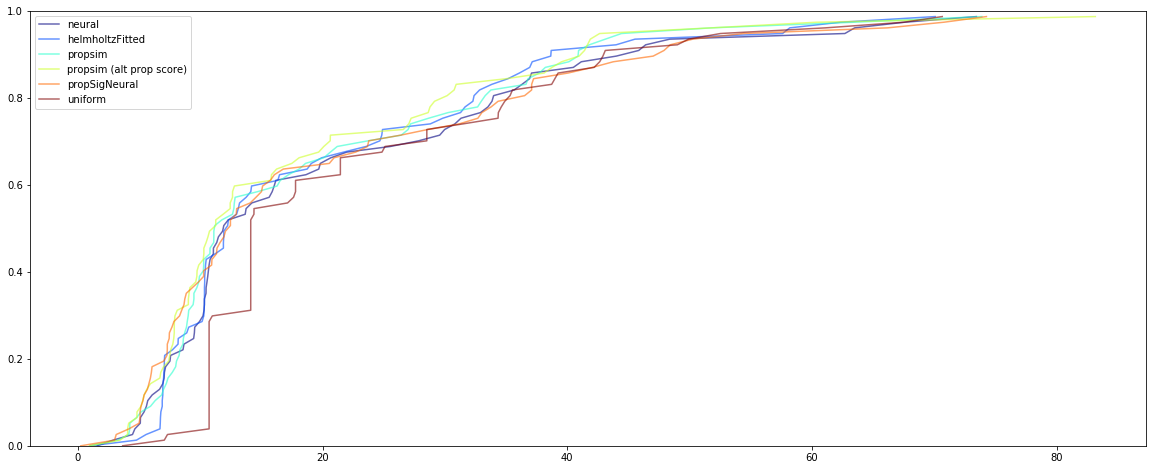

In [200]:
modelToLogPosteriors = {model: [task2LogPosterior[t] for t in sorted(task2LogPosterior.keys(), key=lambda task: task.name)] for model, task2LogPosterior in modelToLogPosteriors.items()}
plt.figure(figsize=(20, 8))
plotProxyResults(modelToLogPosteriors, save=False)